In [94]:
import numpy as np
import pickle
import os
import re

test = []
directory = "./lattice_35p0b_0p25k_8_20/"

for f in os.listdir(directory):
    pattern = re.search("_([0-9]+)\.measurement.cfg", f)
    if pattern is not None:
        test.append((int(pattern.group(1)), f))

configurations = []

for index, f in sorted(test, key=lambda x: x[0]):
    if index < 25:
        continue
    with open(directory+f, "rb") as binary_file:
        configurations.append(pickle.load(binary_file))

print("Imported", len(configurations), "configurations")

58


In [95]:
correlators = []

for measurements in configurations:
    for measurement in measurements:
        if measurement.name == "pion_operator":
            correlators.append(measurement.value)

correlators = np.real(np.array(correlators))

<ErrorbarContainer object of 3 artists>

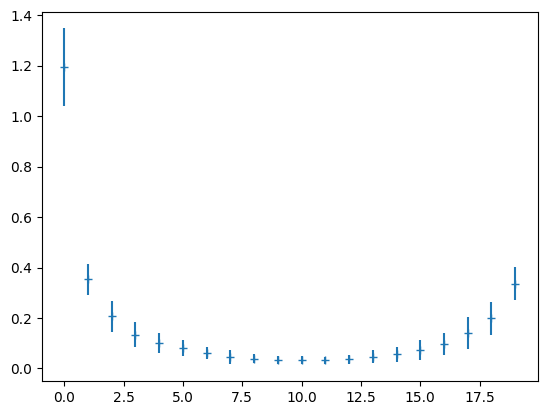

In [96]:
import matplotlib.pyplot as plt

plt.errorbar(np.arange(correlators.shape[1]), np.mean(correlators,axis=0), yerr=np.std(correlators,axis=0),fmt="+")

(-5.0, 1.0)

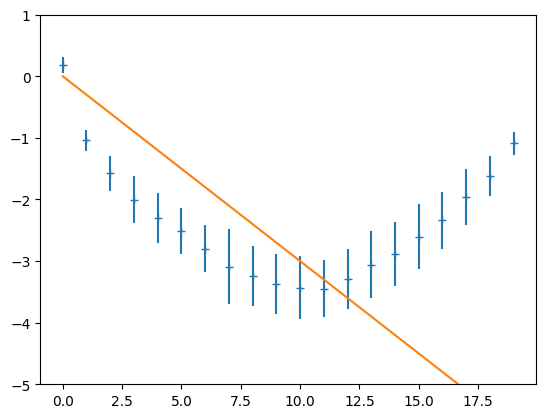

In [98]:
plt.errorbar(np.arange(correlators.shape[1]),
             np.log(np.mean(correlators,axis=0)),
             yerr=np.std(correlators,axis=0)/np.mean(correlators,axis=0),
             fmt="+")

plt.plot(np.arange(correlators.shape[1]), -0.3*np.arange(correlators.shape[1]))
plt.ylim(-5,1)

In [99]:
boot_effective_mass = []
boot_corr = []

for i in range(100):
    random_indexes = np.random.randint(0, len(correlators),size=len(correlators))
    boot_effective_mass.append(np.log(np.mean(correlators[random_indexes,:-1],axis=0)/np.mean(correlators[random_indexes,1:],axis=0)))
    boot_corr.append(np.mean(correlators[random_indexes],axis=0))

In [100]:
from scipy.optimize import minimize

def chi(A,m,t0,data,sigma):
    t = np.arange(0,len(data))
    T = len(data)
    diff = A*(np.exp(-t*m)+np.exp(-(T-t)*m)) - data
    return np.sum(diff[t0:-t0]**2/sigma[t0:-t0]**2)/(len(data) - 2*t0)

boot = []

std_dev = np.std(boot_corr,axis=0)

for i in range(100):
    random_indexes = np.random.randint(0, len(correlators),size=len(correlators))
    min = minimize(lambda x: chi(x[0],x[1],7,np.mean(correlators[random_indexes],axis=0), std_dev), [0.5,1.0], method="Nelder-Mead")
    boot.append(min.x[1])

In [101]:
np.mean(boot),np.std(boot)

(0.30189786551095976, 0.030490184772244022)

In [92]:
np.mean(boot),np.std(boot)

(0.2897518571202665, 0.034394540243847964)

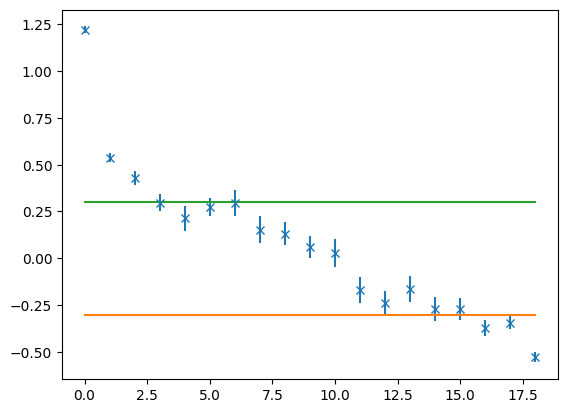

In [102]:
tt = np.arange(correlators.shape[1]-1)

plt.errorbar(tt,np.mean(boot_effective_mass,axis=0),yerr=np.std(boot_effective_mass,axis=0),fmt="x")
plt.plot(tt,[-np.mean(boot) for t in tt])
plt.plot(tt,[+np.mean(boot) for t in tt])

In [11]:
np.abs(0.5540-0.5689)/(np.sqrt(0.0073**2 + 0.0051**2))

1.6732070074517353